In [1]:
# So, now solve the initial k iterations of the grid by forward check and rest by backtracking

def print_sudoku(grid):
    for row in grid:
        print(" ".join(str(num) if num != 0 else '.' for num in row))

def is_valid(grid, row, col, num):
    for x in range(9):
        if grid[row][x] == num or grid[x][col] == num:
            return False
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(3):
        for j in range(3):
            if grid[start_row + i][start_col + j] == num:
                return False
    return True

def get_constraints(grid):
    constraints = {}
    for row in range(9):
        for col in range(9):
            if grid[row][col] == 0:
                allowed_values = set(range(1, 10))
                for x in range(9):
                    if grid[row][x] in allowed_values:
                        allowed_values.remove(grid[row][x])
                    if grid[x][col] in allowed_values:
                        allowed_values.remove(grid[x][col])
                start_row, start_col = 3 * (row // 3), 3 * (col // 3)
                for i in range(3):
                    for j in range(3):
                        if grid[start_row + i][start_col + j] in allowed_values:
                            allowed_values.remove(grid[start_row + i][start_col + j])
                constraints[(row, col)] = allowed_values
    return constraints

def forward_checking(grid, constraints, iterations):
    def assign_value(row, col, num):
        grid[row][col] = num
        for x in range(9):
            if (row, x) in constraints:
                constraints[(row, x)].discard(num)
            if (x, col) in constraints:
                constraints[(x, col)].discard(num)
        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(3):
            for j in range(3):
                if (start_row + i, start_col + j) in constraints:
                    constraints[(start_row + i, start_col + j)].discard(num)

    for _ in range(iterations):
        if not constraints:
            break
        min_cell = min(constraints, key=lambda k: len(constraints[k]))
        if len(constraints[min_cell]) == 0:
            break
        num = constraints[min_cell].pop()
        # print(f"Assigning {num} to cell {min_cell} with {len(constraints[min_cell])} remaining values")
        assign_value(min_cell[0], min_cell[1], num)
        del constraints[min_cell]

    return grid

# Create a fn that solves sudoku by backtracking
def backtracking(sudoku_grid):
    def solve_sudoku(grid):
        for row in range(9):
            for col in range(9):
                if grid[row][col] == 0:
                    for num in range(1, 10):
                        if is_valid(grid, row, col, num):
                            grid[row][col] = num
                            if solve_sudoku(grid):
                                return True
                            grid[row][col] = 0
                    return False
        return True

    solve_sudoku(sudoku_grid)
    
    return sudoku_grid


In [2]:
import time

sudoku_grid = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

# Running for 10 iterations of forward checking and rest by backtracking and measuring time
start_time = time.time_ns()
constraints = get_constraints(sudoku_grid)
sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
print_sudoku(sudoku_grid)
sudoku_grid = backtracking(sudoku_grid)
print_sudoku(sudoku_grid)
end_time = time.time_ns()

print("Time taken:", (end_time - start_time)/1e6, "ms")


5 3 . . 7 . . . .
6 . . 1 9 5 . . .
. 9 8 . 4 2 . 6 .
8 . . 7 6 . . . 3
4 2 6 8 5 3 7 9 1
7 . . 9 2 . . . 6
. 6 . . 3 . 2 8 .
. . . 4 1 9 . . 5
. . . . 8 . . 7 9
5 3 4 6 7 8 9 1 2
6 7 2 1 9 5 3 4 8
1 9 8 3 4 2 5 6 7
8 5 9 7 6 1 4 2 3
4 2 6 8 5 3 7 9 1
7 1 3 9 2 4 8 5 6
9 6 1 5 3 7 2 8 4
2 8 7 4 1 9 6 3 5
3 4 5 2 8 6 1 7 9
Time taken: 2.9998 ms


In [3]:

def convert_to_2D_list(sudoku_str):
    sudoku_grid = []
    for i in range(9):
        row = []
        for j in range(9):
            if sudoku_str[i*9+j] == '.':
                row.append(0)
            else:
                row.append(int(sudoku_str[i*9+j]))
        sudoku_grid.append(row)
    return sudoku_grid

# For Easy Type

In [4]:
# Read the file easy_sudoku.txt and store the time taken to solve each sudoku
import tqdm
easy_times_10_run_1 = []
easy_times_10_run_2 = []
easy_times_10_run_3 = []



with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_10_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_10_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_10_run_3.append((end_time - start_time)/1e6)




360it [00:20, 17.52it/s]


In [5]:
# Read the file easy_sudoku.txt and store the time taken to solve each sudoku
import tqdm
easy_times_30_run_1 = []
easy_times_30_run_2 = []
easy_times_30_run_3 = []



with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_30_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_30_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_30_run_3.append((end_time - start_time)/1e6)





360it [00:07, 47.13it/s] 


In [6]:
# Read the file easy_sudoku.txt and store the time taken to solve each sudoku
import tqdm
easy_times_50_run_1 = []
easy_times_50_run_2 = []
easy_times_50_run_3 = []



with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_50_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_50_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_50_run_3.append((end_time - start_time)/1e6)





360it [00:06, 57.56it/s] 


In [7]:
# Print the mean of all the 9 arrays
import numpy as np

print("Mean Runtime for Easy, 10 iter, trial 1:", np.mean(easy_times_10_run_1))
print("Mean Runtime for Easy, 10 iter, trial 2:", np.mean(easy_times_10_run_2))
print("Mean Runtime for Easy, 10 iter, trial 3:", np.mean(easy_times_10_run_3))

print("Mean Runtime for Easy, 30 iter, trial 1:", np.mean(easy_times_30_run_1))
print("Mean Runtime for Easy, 30 iter, trial 2:", np.mean(easy_times_30_run_2))
print("Mean Runtime for Easy, 30 iter, trial 3:", np.mean(easy_times_30_run_3))

print("Mean Runtime for Easy, 50 iter, trial 1:", np.mean(easy_times_50_run_1))
print("Mean Runtime for Easy, 50 iter, trial 2:", np.mean(easy_times_50_run_2))
print("Mean Runtime for Easy, 50 iter, trial 3:", np.mean(easy_times_50_run_3))

Mean Runtime for Easy, 10 iter, trial 1: 39.247659444444444
Mean Runtime for Easy, 10 iter, trial 2: 9.32508111111111
Mean Runtime for Easy, 10 iter, trial 3: 8.228588333333333
Mean Runtime for Easy, 30 iter, trial 1: 7.869650277777778
Mean Runtime for Easy, 30 iter, trial 2: 6.940849166666666
Mean Runtime for Easy, 30 iter, trial 3: 6.2634597222222235
Mean Runtime for Easy, 50 iter, trial 1: 5.923126388888889
Mean Runtime for Easy, 50 iter, trial 2: 5.668468888888889
Mean Runtime for Easy, 50 iter, trial 3: 5.686170833333334


In [8]:
# Runtime for 10iter, 30iter, 50iter

print("Mean Runtime for Easy, 10 iter:", (np.mean(easy_times_10_run_1) + np.mean(easy_times_10_run_2) + np.mean(easy_times_10_run_3))/3)
print("Mean Runtime for Easy, 30 iter:", (np.mean(easy_times_30_run_1) + np.mean(easy_times_30_run_2) + np.mean(easy_times_30_run_3))/3)
print("Mean Runtime for Easy, 50 iter:", (np.mean(easy_times_50_run_1) + np.mean(easy_times_50_run_2) + np.mean(easy_times_50_run_3))/3)

Mean Runtime for Easy, 10 iter: 18.933776296296298
Mean Runtime for Easy, 30 iter: 7.024653055555556
Mean Runtime for Easy, 50 iter: 5.759255370370371


In [9]:
# Doing for 20, 40

# Read the file easy_sudoku.txt and store the time taken to solve each sudoku
import tqdm
easy_times_20_run_1 = []
easy_times_20_run_2 = []
easy_times_20_run_3 = []

with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_20_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_20_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_20_run_3.append((end_time - start_time)/1e6)



# Read the file easy_sudoku.txt and store the time taken to solve each sudoku
import tqdm
easy_times_40_run_1 = []
easy_times_40_run_2 = []
easy_times_40_run_3 = []

with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_40_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_40_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        easy_times_40_run_3.append((end_time - start_time)/1e6)



# Print the mean of all the 9 arrays
import numpy as np

print("Mean Runtime for Easy, 20 iter, trial 1:", np.mean(easy_times_20_run_1))
print("Mean Runtime for Easy, 20 iter, trial 2:", np.mean(easy_times_20_run_2))
print("Mean Runtime for Easy, 20 iter, trial 3:", np.mean(easy_times_20_run_3))

print("Mean Runtime for Easy, 40 iter, trial 1:", np.mean(easy_times_40_run_1))
print("Mean Runtime for Easy, 40 iter, trial 2:", np.mean(easy_times_40_run_2))
print("Mean Runtime for Easy, 40 iter, trial 3:", np.mean(easy_times_40_run_3))

# Runtime for 20iter, 40iter

print("Mean Runtime for Easy, 20 iter:", (np.mean(easy_times_20_run_1) + np.mean(easy_times_20_run_2) + np.mean(easy_times_20_run_3))/3)
print("Mean Runtime for Easy, 40 iter:", (np.mean(easy_times_40_run_1) + np.mean(easy_times_40_run_2) + np.mean(easy_times_40_run_3))/3)


360it [00:07, 51.26it/s] 
360it [00:06, 57.03it/s] 

Mean Runtime for Easy, 20 iter, trial 1: 7.8280925
Mean Runtime for Easy, 20 iter, trial 2: 5.705253333333333
Mean Runtime for Easy, 20 iter, trial 3: 5.8650166666666665
Mean Runtime for Easy, 40 iter, trial 1: 6.3065880555555545
Mean Runtime for Easy, 40 iter, trial 2: 5.604841666666666
Mean Runtime for Easy, 40 iter, trial 3: 5.506740555555555
Mean Runtime for Easy, 20 iter: 6.466120833333334
Mean Runtime for Easy, 40 iter: 5.806056759259259


# For Medium Type

In [10]:
# For medium sudokus
medium_times_10_run_1 = []
medium_times_10_run_2 = []
medium_times_10_run_3 = []

with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_10_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_10_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_10_run_3.append((end_time - start_time)/1e6)
        

873it [00:13, 66.82it/s] 


In [11]:
# For medium sudokus
medium_times_20_run_1 = []
medium_times_20_run_2 = []
medium_times_20_run_3 = []

with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_20_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_20_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_20_run_3.append((end_time - start_time)/1e6)
        

873it [00:06, 132.81it/s]


In [12]:
medium_times_30_run_1 = []
medium_times_30_run_2 = []
medium_times_30_run_3 = []

with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_30_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_30_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_30_run_3.append((end_time - start_time)/1e6)

        

873it [00:05, 161.65it/s]


In [13]:
# For medium sudokus
medium_times_40_run_1 = []
medium_times_40_run_2 = []
medium_times_40_run_3 = []

with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_40_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_40_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_40_run_3.append((end_time - start_time)/1e6)
        

873it [00:05, 168.79it/s]


In [14]:
medium_times_50_run_1 = []
medium_times_50_run_2 = []
medium_times_50_run_3 = []

with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_50_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_50_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        medium_times_50_run_3.append((end_time - start_time)/1e6)

873it [00:05, 163.41it/s]


In [15]:
print("Mean Runtime for Medium, 10 iter, trial 1:", np.mean(medium_times_10_run_1))
print("Mean Runtime for Medium, 10 iter, trial 2:", np.mean(medium_times_10_run_2))
print("Mean Runtime for Medium, 10 iter, trial 3:", np.mean(medium_times_10_run_3))

print("Mean Runtime for Medium, 20 iter, trial 1:", np.mean(medium_times_20_run_1))
print("Mean Runtime for Medium, 20 iter, trial 2:", np.mean(medium_times_20_run_2))
print("Mean Runtime for Medium, 20 iter, trial 3:", np.mean(medium_times_20_run_3))

print("Mean Runtime for Medium, 30 iter, trial 1:", np.mean(medium_times_30_run_1))
print("Mean Runtime for Medium, 30 iter, trial 2:", np.mean(medium_times_30_run_2))
print("Mean Runtime for Medium, 30 iter, trial 3:", np.mean(medium_times_30_run_3))

print("Mean Runtime for Medium, 40 iter, trial 1:", np.mean(medium_times_40_run_1))
print("Mean Runtime for Medium, 40 iter, trial 2:", np.mean(medium_times_40_run_2))
print("Mean Runtime for Medium, 40 iter, trial 3:", np.mean(medium_times_40_run_3))

print("Mean Runtime for Medium, 50 iter, trial 1:", np.mean(medium_times_50_run_1))
print("Mean Runtime for Medium, 50 iter, trial 2:", np.mean(medium_times_50_run_2))
print("Mean Runtime for Medium, 50 iter, trial 3:", np.mean(medium_times_50_run_3))

# Runtime for 10iter, 30iter, 50iter

print("Mean Runtime for Medium, 10 iter:", (np.mean(medium_times_10_run_1) + np.mean(medium_times_10_run_2) + np.mean(medium_times_10_run_3))/3)
print("Mean Runtime for Medium, 20 iter:", (np.mean(medium_times_20_run_1) + np.mean(medium_times_20_run_2) + np.mean(medium_times_20_run_3))/3)
print("Mean Runtime for Medium, 30 iter:", (np.mean(medium_times_30_run_1) + np.mean(medium_times_30_run_2) + np.mean(medium_times_30_run_3))/3)
print("Mean Runtime for Medium, 40 iter:", (np.mean(medium_times_40_run_1) + np.mean(medium_times_40_run_2) + np.mean(medium_times_40_run_3))/3)
print("Mean Runtime for Medium, 50 iter:", (np.mean(medium_times_50_run_1) + np.mean(medium_times_50_run_2) + np.mean(medium_times_50_run_3))/3)

Mean Runtime for Medium, 10 iter, trial 1: 10.821030011454754
Mean Runtime for Medium, 10 iter, trial 2: 2.1692169530355097
Mean Runtime for Medium, 10 iter, trial 3: 1.7684608247422682
Mean Runtime for Medium, 20 iter, trial 1: 3.481374455899198
Mean Runtime for Medium, 20 iter, trial 2: 2.0024851088201605
Mean Runtime for Medium, 20 iter, trial 3: 1.9489439862542957
Mean Runtime for Medium, 30 iter, trial 1: 2.425500916380298
Mean Runtime for Medium, 30 iter, trial 2: 1.8481797250859107
Mean Runtime for Medium, 30 iter, trial 3: 1.84527686139748
Mean Runtime for Medium, 40 iter, trial 1: 2.2349053837342496
Mean Runtime for Medium, 40 iter, trial 2: 1.8059884306987402
Mean Runtime for Medium, 40 iter, trial 3: 1.8105454753722796
Mean Runtime for Medium, 50 iter, trial 1: 2.2274347079037797
Mean Runtime for Medium, 50 iter, trial 2: 1.9358521191294387
Mean Runtime for Medium, 50 iter, trial 3: 1.8892601374570448
Mean Runtime for Medium, 10 iter: 4.919569263077511
Mean Runtime for Mediu

In [16]:
# For hard sudokus
hard_times_10_run_1 = []
hard_times_10_run_2 = []
hard_times_10_run_3 = []

with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_10_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_10_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_10_run_3.append((end_time - start_time)/1e6)

# For 20
hard_times_20_run_1 = []
hard_times_20_run_2 = []
hard_times_20_run_3 = []

with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_20_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_20_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_20_run_3.append((end_time - start_time)/1e6)


hard_times_30_run_1 = []
hard_times_30_run_2 = []
hard_times_30_run_3 = []

with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_30_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_30_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_30_run_3.append((end_time - start_time)/1e6)



hard_times_40_run_1 = []
hard_times_40_run_2 = []
hard_times_40_run_3 = []

with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_40_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_40_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_40_run_3.append((end_time - start_time)/1e6)

hard_times_50_run_1 = []
hard_times_50_run_2 = []
hard_times_50_run_3 = []

with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_50_run_1.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_50_run_2.append((end_time - start_time)/1e6)

        start_time = time.time_ns()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        end_time = time.time_ns()
        hard_times_50_run_3.append((end_time - start_time)/1e6)

print("Mean Runtime for Hard, 10 iter, trial 1:", np.mean(hard_times_10_run_1))
print("Mean Runtime for Hard, 10 iter, trial 2:", np.mean(hard_times_10_run_2))
print("Mean Runtime for Hard, 10 iter, trial 3:", np.mean(hard_times_10_run_3))

print("Mean Runtime for Hard, 20 iter, trial 1:", np.mean(hard_times_20_run_1))
print("Mean Runtime for Hard, 20 iter, trial 2:", np.mean(hard_times_20_run_2))
print("Mean Runtime for Hard, 20 iter, trial 3:", np.mean(hard_times_20_run_3))

print("Mean Runtime for Hard, 30 iter, trial 1:", np.mean(hard_times_30_run_1))
print("Mean Runtime for Hard, 30 iter, trial 2:", np.mean(hard_times_30_run_2))
print("Mean Runtime for Hard, 30 iter, trial 3:", np.mean(hard_times_30_run_3))

print("Mean Runtime for Hard, 40 iter, trial 1:", np.mean(hard_times_40_run_1))
print("Mean Runtime for Hard, 40 iter, trial 2:", np.mean(hard_times_40_run_2))
print("Mean Runtime for Hard, 40 iter, trial 3:", np.mean(hard_times_40_run_3))

print("Mean Runtime for Hard, 50 iter, trial 1:", np.mean(hard_times_50_run_1))
print("Mean Runtime for Hard, 50 iter, trial 2:", np.mean(hard_times_50_run_2))
print("Mean Runtime for Hard, 50 iter, trial 3:", np.mean(hard_times_50_run_3))

# Runtime for 10iter, 30iter, 50iter

print("Mean Runtime for Hard, 10 iter:", (np.mean(hard_times_10_run_1) + np.mean(hard_times_10_run_2) + np.mean(hard_times_10_run_3))/3)
print("Mean Runtime for Hard, 20 iter:", (np.mean(hard_times_20_run_1) + np.mean(hard_times_20_run_2) + np.mean(hard_times_20_run_3))/3)
print("Mean Runtime for Hard, 30 iter:", (np.mean(hard_times_30_run_1) + np.mean(hard_times_30_run_2) + np.mean(hard_times_30_run_3))/3)
print("Mean Runtime for Hard, 40 iter:", (np.mean(hard_times_40_run_1) + np.mean(hard_times_40_run_2) + np.mean(hard_times_40_run_3))/3)
print("Mean Runtime for Hard, 50 iter:", (np.mean(hard_times_50_run_1) + np.mean(hard_times_50_run_2) + np.mean(hard_times_50_run_3))/3)


267it [00:00, 325.61it/s]
267it [00:00, 679.11it/s]
267it [00:00, 826.62it/s]
267it [00:00, 922.82it/s] 
267it [00:00, 966.22it/s] 

Mean Runtime for Hard, 10 iter, trial 1: 2.566748689138577
Mean Runtime for Hard, 10 iter, trial 2: 0.2573666666666667
Mean Runtime for Hard, 10 iter, trial 3: 0.18318501872659174
Mean Runtime for Hard, 20 iter, trial 1: 1.063940449438202
Mean Runtime for Hard, 20 iter, trial 2: 0.17678651685393257
Mean Runtime for Hard, 20 iter, trial 3: 0.18816142322097376
Mean Runtime for Hard, 30 iter, trial 1: 0.8011505617977528
Mean Runtime for Hard, 30 iter, trial 2: 0.19598614232209738
Mean Runtime for Hard, 30 iter, trial 3: 0.18261123595505618
Mean Runtime for Hard, 40 iter, trial 1: 0.6793325842696629
Mean Runtime for Hard, 40 iter, trial 2: 0.1908239700374532
Mean Runtime for Hard, 40 iter, trial 3: 0.18737191011235957
Mean Runtime for Hard, 50 iter, trial 1: 0.6645921348314606
Mean Runtime for Hard, 50 iter, trial 2: 0.17192097378277155
Mean Runtime for Hard, 50 iter, trial 3: 0.16121535580524343
Mean Runtime for Hard, 10 iter: 1.0024334581772785
Mean Runtime for Hard, 20 iter: 0.476296129

# MEMORY ANALYSIS

In [17]:
# Performing memory consumption analysis
import tracemalloc

easy_memory_10_run_1 = []
easy_memory_10_run_2 = []
easy_memory_10_run_3 = []


with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_10_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_10_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_10_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Easy, 10 iter, trial 1:", np.mean(easy_memory_10_run_1), "Unit: Bytes")
print("Mean Memory for Easy, 10 iter, trial 2:", np.mean(easy_memory_10_run_2), "Unit: Bytes")
print("Mean Memory for Easy, 10 iter, trial 3:", np.mean(easy_memory_10_run_3), "Unit: Bytes")


easy_memory_20_run_1 = []
easy_memory_20_run_2 = []
easy_memory_20_run_3 = []


with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_20_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_20_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_20_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Easy, 20 iter, trial 1:", np.mean(easy_memory_20_run_1), "Unit: Bytes")
print("Mean Memory for Easy, 20 iter, trial 2:", np.mean(easy_memory_20_run_2), "Unit: Bytes")
print("Mean Memory for Easy, 20 iter, trial 3:", np.mean(easy_memory_20_run_3), "Unit: Bytes")

easy_memory_30_run_1 = []
easy_memory_30_run_2 = []
easy_memory_30_run_3 = []


with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_30_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_30_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_30_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Easy, 30 iter, trial 1:", np.mean(easy_memory_30_run_1), "Unit: Bytes")
print("Mean Memory for Easy, 30 iter, trial 2:", np.mean(easy_memory_30_run_2), "Unit: Bytes")
print("Mean Memory for Easy, 30 iter, trial 3:", np.mean(easy_memory_30_run_3), "Unit: Bytes")



easy_memory_40_run_1 = []
easy_memory_40_run_2 = []
easy_memory_40_run_3 = []


with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_40_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_40_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_40_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Easy, 40 iter, trial 1:", np.mean(easy_memory_40_run_1), "Unit: Bytes")
print("Mean Memory for Easy, 40 iter, trial 2:", np.mean(easy_memory_40_run_2), "Unit: Bytes")
print("Mean Memory for Easy, 40 iter, trial 3:", np.mean(easy_memory_40_run_3), "Unit: Bytes")

easy_memory_50_run_1 = []
easy_memory_50_run_2 = []
easy_memory_50_run_3 = []


with open("easy_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_50_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_50_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        easy_memory_50_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Easy, 50 iter, trial 1:", np.mean(easy_memory_50_run_1), "Unit: Bytes")
print("Mean Memory for Easy, 50 iter, trial 2:", np.mean(easy_memory_50_run_2), "Unit: Bytes")
print("Mean Memory for Easy, 50 iter, trial 3:", np.mean(easy_memory_50_run_3), "Unit: Bytes")


360it [00:57,  6.30it/s]


Mean Memory for Easy, 10 iter, trial 1: 90747.04166666667 Unit: Bytes
Mean Memory for Easy, 10 iter, trial 2: 32891.025 Unit: Bytes
Mean Memory for Easy, 10 iter, trial 3: 26311.080555555556 Unit: Bytes


360it [00:27, 13.04it/s]


Mean Memory for Easy, 20 iter, trial 1: 58757.97222222222 Unit: Bytes
Mean Memory for Easy, 20 iter, trial 2: 33278.28611111111 Unit: Bytes
Mean Memory for Easy, 20 iter, trial 3: 28997.219444444443 Unit: Bytes


360it [00:45,  7.88it/s]


Mean Memory for Easy, 30 iter, trial 1: 51121.85 Unit: Bytes
Mean Memory for Easy, 30 iter, trial 2: 34943.63888888889 Unit: Bytes
Mean Memory for Easy, 30 iter, trial 3: 33235.686111111114 Unit: Bytes


360it [00:49,  7.24it/s]


Mean Memory for Easy, 40 iter, trial 1: 46350.27777777778 Unit: Bytes
Mean Memory for Easy, 40 iter, trial 2: 35744.444444444445 Unit: Bytes
Mean Memory for Easy, 40 iter, trial 3: 34912.188888888886 Unit: Bytes


360it [00:42,  8.49it/s]

Mean Memory for Easy, 50 iter, trial 1: 45956.194444444445 Unit: Bytes
Mean Memory for Easy, 50 iter, trial 2: 32038.722222222223 Unit: Bytes
Mean Memory for Easy, 50 iter, trial 3: 33273.22777777778 Unit: Bytes


In [18]:
# Performing this for medium sudokus
medium_memory_10_run_1 = []
medium_memory_10_run_2 = []
medium_memory_10_run_3 = []


with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_10_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_10_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_10_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Medium, 10 iter, trial 1:", np.mean(medium_memory_10_run_1), "Unit: Bytes")
print("Mean Memory for Medium, 10 iter, trial 2:", np.mean(medium_memory_10_run_2), "Unit: Bytes")
print("Mean Memory for Medium, 10 iter, trial 3:", np.mean(medium_memory_10_run_3), "Unit: Bytes")


medium_memory_20_run_1 = []
medium_memory_20_run_2 = []
medium_memory_20_run_3 = []


with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_20_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_20_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_20_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Medium, 20 iter, trial 1:", np.mean(medium_memory_20_run_1), "Unit: Bytes")
print("Mean Memory for Medium, 20 iter, trial 2:", np.mean(medium_memory_20_run_2), "Unit: Bytes")
print("Mean Memory for Medium, 20 iter, trial 3:", np.mean(medium_memory_20_run_3), "Unit: Bytes")


medium_memory_30_run_1 = []
medium_memory_30_run_2 = []
medium_memory_30_run_3 = []


with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_30_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_30_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_30_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Medium, 30 iter, trial 1:", np.mean(medium_memory_30_run_1), "Unit: Bytes")
print("Mean Memory for Medium, 30 iter, trial 2:", np.mean(medium_memory_30_run_2), "Unit: Bytes")
print("Mean Memory for Medium, 30 iter, trial 3:", np.mean(medium_memory_30_run_3), "Unit: Bytes")


medium_memory_40_run_1 = []
medium_memory_40_run_2 = []
medium_memory_40_run_3 = []


with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_40_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_40_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_40_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Medium, 40 iter, trial 1:", np.mean(medium_memory_40_run_1), "Unit: Bytes")
print("Mean Memory for Medium, 40 iter, trial 2:", np.mean(medium_memory_40_run_2), "Unit: Bytes")
print("Mean Memory for Medium, 40 iter, trial 3:", np.mean(medium_memory_40_run_3), "Unit: Bytes")


medium_memory_50_run_1 = []
medium_memory_50_run_2 = []
medium_memory_50_run_3 = []


with open("medium_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_50_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_50_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        medium_memory_50_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Medium, 50 iter, trial 1:", np.mean(medium_memory_50_run_1), "Unit: Bytes")
print("Mean Memory for Medium, 50 iter, trial 2:", np.mean(medium_memory_50_run_2), "Unit: Bytes")
print("Mean Memory for Medium, 50 iter, trial 3:", np.mean(medium_memory_50_run_3), "Unit: Bytes")

873it [01:15, 11.56it/s]


Mean Memory for Medium, 10 iter, trial 1: 78284.1981672394 Unit: Bytes
Mean Memory for Medium, 10 iter, trial 2: 21198.01030927835 Unit: Bytes
Mean Memory for Medium, 10 iter, trial 3: 19097.953035509738 Unit: Bytes


873it [00:34, 25.23it/s]


Mean Memory for Medium, 20 iter, trial 1: 46135.20160366552 Unit: Bytes
Mean Memory for Medium, 20 iter, trial 2: 24642.12027491409 Unit: Bytes
Mean Memory for Medium, 20 iter, trial 3: 22000.524627720504 Unit: Bytes


873it [00:21, 40.32it/s] 


Mean Memory for Medium, 30 iter, trial 1: 34954.58762886598 Unit: Bytes
Mean Memory for Medium, 30 iter, trial 2: 24740.36655211913 Unit: Bytes
Mean Memory for Medium, 30 iter, trial 3: 22133.501718213058 Unit: Bytes


873it [00:38, 22.89it/s] 


Mean Memory for Medium, 40 iter, trial 1: 33788.644902634594 Unit: Bytes
Mean Memory for Medium, 40 iter, trial 2: 25741.058419243986 Unit: Bytes
Mean Memory for Medium, 40 iter, trial 3: 22519.97594501718 Unit: Bytes


873it [00:32, 26.49it/s]

Mean Memory for Medium, 50 iter, trial 1: 32912.38373424971 Unit: Bytes
Mean Memory for Medium, 50 iter, trial 2: 24547.856815578463 Unit: Bytes
Mean Memory for Medium, 50 iter, trial 3: 22860.54410080183 Unit: Bytes


In [19]:
# Doing this for hard sudokus
hard_memory_10_run_1 = []
hard_memory_10_run_2 = []
hard_memory_10_run_3 = []


with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_10_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_10_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 10)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_10_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Hard, 10 iter, trial 1:", np.mean(hard_memory_10_run_1), "Unit: Bytes")
print("Mean Memory for Hard, 10 iter, trial 2:", np.mean(hard_memory_10_run_2), "Unit: Bytes")
print("Mean Memory for Hard, 10 iter, trial 3:", np.mean(hard_memory_10_run_3), "Unit: Bytes")


hard_memory_20_run_1 = []
hard_memory_20_run_2 = []
hard_memory_20_run_3 = []


with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_20_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_20_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 20)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_20_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Hard, 20 iter, trial 1:", np.mean(hard_memory_20_run_1), "Unit: Bytes")
print("Mean Memory for Hard, 20 iter, trial 2:", np.mean(hard_memory_20_run_2), "Unit: Bytes")
print("Mean Memory for Hard, 20 iter, trial 3:", np.mean(hard_memory_20_run_3), "Unit: Bytes")

hard_memory_30_run_1 = []
hard_memory_30_run_2 = []
hard_memory_30_run_3 = []


with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_30_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_30_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 30)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_30_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Hard, 30 iter, trial 1:", np.mean(hard_memory_30_run_1), "Unit: Bytes")
print("Mean Memory for Hard, 30 iter, trial 2:", np.mean(hard_memory_30_run_2), "Unit: Bytes")
print("Mean Memory for Hard, 30 iter, trial 3:", np.mean(hard_memory_30_run_3), "Unit: Bytes")


hard_memory_40_run_1 = []
hard_memory_40_run_2 = []
hard_memory_40_run_3 = []


with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_40_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_40_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 40)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_40_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Hard, 40 iter, trial 1:", np.mean(hard_memory_40_run_1), "Unit: Bytes")
print("Mean Memory for Hard, 40 iter, trial 2:", np.mean(hard_memory_40_run_2), "Unit: Bytes")
print("Mean Memory for Hard, 40 iter, trial 3:", np.mean(hard_memory_40_run_3), "Unit: Bytes")

hard_memory_50_run_1 = []
hard_memory_50_run_2 = []
hard_memory_50_run_3 = []


with open("hard_sudokus.txt") as f:
    for line in tqdm.tqdm(f):
        # Convert the string to a 2D list
        sudoku_grid = convert_to_2D_list(line.strip())
        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_50_run_1.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_50_run_2.append(current)
        tracemalloc.stop()

        tracemalloc.start()
        constraints = get_constraints(sudoku_grid)
        sudoku_grid = forward_checking(sudoku_grid, constraints, 50)
        sudoku_grid = backtracking(sudoku_grid)
        current, peak = tracemalloc.get_traced_memory()
        hard_memory_50_run_3.append(current)
        tracemalloc.stop()

print("Mean Memory for Hard, 50 iter, trial 1:", np.mean(hard_memory_50_run_1), "Unit: Bytes")
print("Mean Memory for Hard, 50 iter, trial 2:", np.mean(hard_memory_50_run_2), "Unit: Bytes")
print("Mean Memory for Hard, 50 iter, trial 3:", np.mean(hard_memory_50_run_3), "Unit: Bytes")

267it [00:02, 89.08it/s] 


Mean Memory for Hard, 10 iter, trial 1: 41176.96629213483 Unit: Bytes
Mean Memory for Hard, 10 iter, trial 2: 6567.98127340824 Unit: Bytes
Mean Memory for Hard, 10 iter, trial 3: 6788.996254681648 Unit: Bytes


267it [00:01, 191.00it/s]


Mean Memory for Hard, 20 iter, trial 1: 28046.370786516854 Unit: Bytes
Mean Memory for Hard, 20 iter, trial 2: 6907.176029962547 Unit: Bytes
Mean Memory for Hard, 20 iter, trial 3: 8522.191011235955 Unit: Bytes


267it [00:01, 251.83it/s]


Mean Memory for Hard, 30 iter, trial 1: 21224.685393258427 Unit: Bytes
Mean Memory for Hard, 30 iter, trial 2: 8135.546816479401 Unit: Bytes
Mean Memory for Hard, 30 iter, trial 3: 8685.05243445693 Unit: Bytes


267it [00:01, 254.46it/s]


Mean Memory for Hard, 40 iter, trial 1: 16611.857677902623 Unit: Bytes
Mean Memory for Hard, 40 iter, trial 2: 7647.895131086142 Unit: Bytes
Mean Memory for Hard, 40 iter, trial 3: 8200.23595505618 Unit: Bytes


267it [00:01, 255.93it/s]

Mean Memory for Hard, 50 iter, trial 1: 12779.18352059925 Unit: Bytes
Mean Memory for Hard, 50 iter, trial 2: 8199.393258426966 Unit: Bytes
Mean Memory for Hard, 50 iter, trial 3: 8198.681647940075 Unit: Bytes


In [20]:
# Print the mean of all the 9 arrays


print("Mean Memory for Easy, 10 iter:", (np.mean(easy_memory_10_run_1) + np.mean(easy_memory_10_run_2) + np.mean(easy_memory_10_run_3))/3)
print("Mean Memory for Easy, 20 iter:", (np.mean(easy_memory_20_run_1) + np.mean(easy_memory_20_run_2) + np.mean(easy_memory_20_run_3))/3)
print("Mean Memory for Easy, 30 iter:", (np.mean(easy_memory_30_run_1) + np.mean(easy_memory_30_run_2) + np.mean(easy_memory_30_run_3))/3)
print("Mean Memory for Easy, 40 iter:", (np.mean(easy_memory_40_run_1) + np.mean(easy_memory_40_run_2) + np.mean(easy_memory_40_run_3))/3)
print("Mean Memory for Easy, 50 iter:", (np.mean(easy_memory_50_run_1) + np.mean(easy_memory_50_run_2) + np.mean(easy_memory_50_run_3))/3)

print("Mean Memory for Medium, 10 iter:", (np.mean(medium_memory_10_run_1) + np.mean(medium_memory_10_run_2) + np.mean(medium_memory_10_run_3))/3)
print("Mean Memory for Medium, 20 iter:", (np.mean(medium_memory_20_run_1) + np.mean(medium_memory_20_run_2) + np.mean(medium_memory_20_run_3))/3)
print("Mean Memory for Medium, 30 iter:", (np.mean(medium_memory_30_run_1) + np.mean(medium_memory_30_run_2) + np.mean(medium_memory_30_run_3))/3)
print("Mean Memory for Medium, 40 iter:", (np.mean(medium_memory_40_run_1) + np.mean(medium_memory_40_run_2) + np.mean(medium_memory_40_run_3))/3)
print("Mean Memory for Medium, 50 iter:", (np.mean(medium_memory_50_run_1) + np.mean(medium_memory_50_run_2) + np.mean(medium_memory_50_run_3))/3)

print("Mean Memory for Hard, 10 iter:", (np.mean(hard_memory_10_run_1) + np.mean(hard_memory_10_run_2) + np.mean(hard_memory_10_run_3))/3)
print("Mean Memory for Hard, 20 iter:", (np.mean(hard_memory_20_run_1) + np.mean(hard_memory_20_run_2) + np.mean(hard_memory_20_run_3))/3)
print("Mean Memory for Hard, 30 iter:", (np.mean(hard_memory_30_run_1) + np.mean(hard_memory_30_run_2) + np.mean(hard_memory_30_run_3))/3)
print("Mean Memory for Hard, 40 iter:", (np.mean(hard_memory_40_run_1) + np.mean(hard_memory_40_run_2) + np.mean(hard_memory_40_run_3))/3)
print("Mean Memory for Hard, 50 iter:", (np.mean(hard_memory_50_run_1) + np.mean(hard_memory_50_run_2) + np.mean(hard_memory_50_run_3))/3)


Mean Memory for Easy, 10 iter: 49983.04907407408
Mean Memory for Easy, 20 iter: 40344.49259259259
Mean Memory for Easy, 30 iter: 39767.05833333333
Mean Memory for Easy, 40 iter: 39002.30370370371
Mean Memory for Easy, 50 iter: 37089.38148148148
Mean Memory for Medium, 10 iter: 39526.720504009165
Mean Memory for Medium, 20 iter: 30925.94883543337
Mean Memory for Medium, 30 iter: 27276.151966399386
Mean Memory for Medium, 40 iter: 27349.893088965255
Mean Memory for Medium, 50 iter: 26773.594883543334
Mean Memory for Hard, 10 iter: 18177.981273408237
Mean Memory for Hard, 20 iter: 14491.912609238452
Mean Memory for Hard, 30 iter: 12681.761548064918
Mean Memory for Hard, 40 iter: 10819.996254681648
Mean Memory for Hard, 50 iter: 9725.752808988764


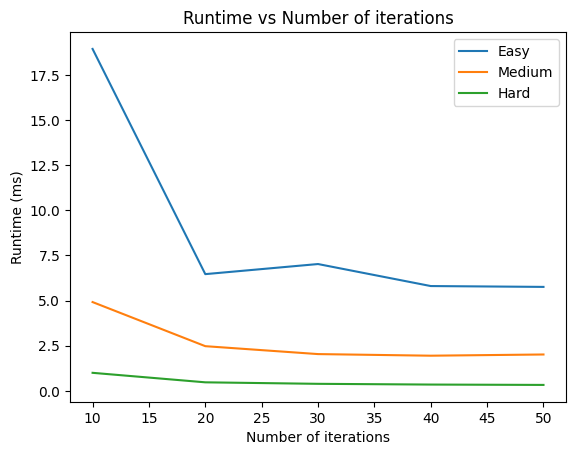

In [21]:
# Plotting
import matplotlib.pyplot as plt

# Plotting the runtime for easy sudokus
x = [10, 20, 30, 40, 50]
y_easy = [(np.mean(easy_times_10_run_1)+np.mean(easy_times_10_run_2)+np.mean(easy_times_10_run_3))/3, (np.mean(easy_times_20_run_1)+np.mean(easy_times_20_run_2)+np.mean(easy_times_20_run_3))/3, (np.mean(easy_times_30_run_1)+np.mean(easy_times_30_run_2)+np.mean(easy_times_30_run_3))/3, (np.mean(easy_times_40_run_1)+np.mean(easy_times_40_run_2)+np.mean(easy_times_40_run_3))/3, (np.mean(easy_times_50_run_1)+np.mean(easy_times_50_run_2)+np.mean(easy_times_50_run_3))/3]
y_medium = [(np.mean(medium_times_10_run_1)+np.mean(medium_times_10_run_2)+np.mean(medium_times_10_run_3))/3, (np.mean(medium_times_20_run_1)+np.mean(medium_times_20_run_2)+np.mean(medium_times_20_run_3))/3, (np.mean(medium_times_30_run_1)+np.mean(medium_times_30_run_2)+np.mean(medium_times_30_run_3))/3, (np.mean(medium_times_40_run_1)+np.mean(medium_times_40_run_2)+np.mean(medium_times_40_run_3))/3, (np.mean(medium_times_50_run_1)+np.mean(medium_times_50_run_2)+np.mean(medium_times_50_run_3))/3]
y_hard =[ (np.mean(hard_times_10_run_1)+np.mean(hard_times_10_run_2)+np.mean(hard_times_10_run_3))/3, (np.mean(hard_times_20_run_1)+np.mean(hard_times_20_run_2)+np.mean(hard_times_20_run_3))/3, (np.mean(hard_times_30_run_1)+np.mean(hard_times_30_run_2)+np.mean(hard_times_30_run_3))/3, (np.mean(hard_times_40_run_1)+np.mean(hard_times_40_run_2)+np.mean(hard_times_40_run_3))/3, (np.mean(hard_times_50_run_1)+np.mean(hard_times_50_run_2)+np.mean(hard_times_50_run_3))/3]
plt.plot(x, y_easy, label="Easy")
plt.plot(x, y_medium, label="Medium")
plt.plot(x, y_hard, label="Hard")
plt.xlabel("Number of iterations")
plt.ylabel("Runtime (ms)")
plt.title("Runtime vs Number of iterations")
plt.legend()
plt.show()

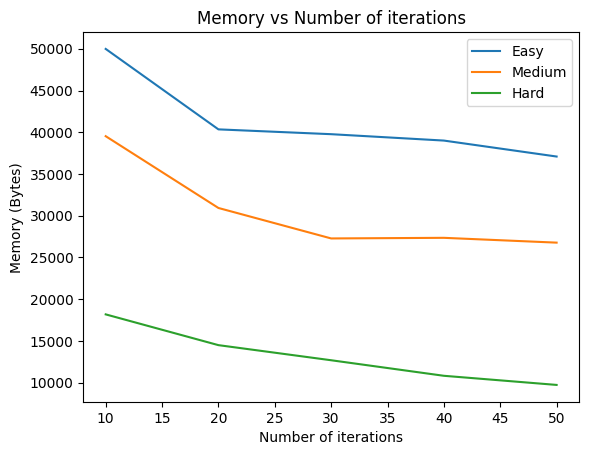

In [22]:
x = [10, 20, 30, 40, 50]
y_easy = [(np.mean(easy_memory_10_run_1)+np.mean(easy_memory_10_run_2)+np.mean(easy_memory_10_run_3))/3, (np.mean(easy_memory_20_run_1)+np.mean(easy_memory_20_run_2)+np.mean(easy_memory_20_run_3))/3, (np.mean(easy_memory_30_run_1)+np.mean(easy_memory_30_run_2)+np.mean(easy_memory_30_run_3))/3, (np.mean(easy_memory_40_run_1)+np.mean(easy_memory_40_run_2)+np.mean(easy_memory_40_run_3))/3, (np.mean(easy_memory_50_run_1)+np.mean(easy_memory_50_run_2)+np.mean(easy_memory_50_run_3))/3]
y_medium = [(np.mean(medium_memory_10_run_1)+np.mean(medium_memory_10_run_2)+np.mean(medium_memory_10_run_3))/3, (np.mean(medium_memory_20_run_1)+np.mean(medium_memory_20_run_2)+np.mean(medium_memory_20_run_3))/3, (np.mean(medium_memory_30_run_1)+np.mean(medium_memory_30_run_2)+np.mean(medium_memory_30_run_3))/3, (np.mean(medium_memory_40_run_1)+np.mean(medium_memory_40_run_2)+np.mean(medium_memory_40_run_3))/3, (np.mean(medium_memory_50_run_1)+np.mean(medium_memory_50_run_2)+np.mean(medium_memory_50_run_3))/3]
y_hard =[ (np.mean(hard_memory_10_run_1)+np.mean(hard_memory_10_run_2)+np.mean(hard_memory_10_run_3))/3, (np.mean(hard_memory_20_run_1)+np.mean(hard_memory_20_run_2)+np.mean(hard_memory_20_run_3))/3, (np.mean(hard_memory_30_run_1)+np.mean(hard_memory_30_run_2)+np.mean(hard_memory_30_run_3))/3, (np.mean(hard_memory_40_run_1)+np.mean(hard_memory_40_run_2)+np.mean(hard_memory_40_run_3))/3, (np.mean(hard_memory_50_run_1)+np.mean(hard_memory_50_run_2)+np.mean(hard_memory_50_run_3))/3]

plt.plot(x, y_easy, label="Easy")
plt.plot(x, y_medium, label="Medium")   
plt.plot(x, y_hard, label="Hard")

plt.xlabel("Number of iterations")
plt.ylabel("Memory (Bytes)")
plt.title("Memory vs Number of iterations")
plt.legend()
plt.show()


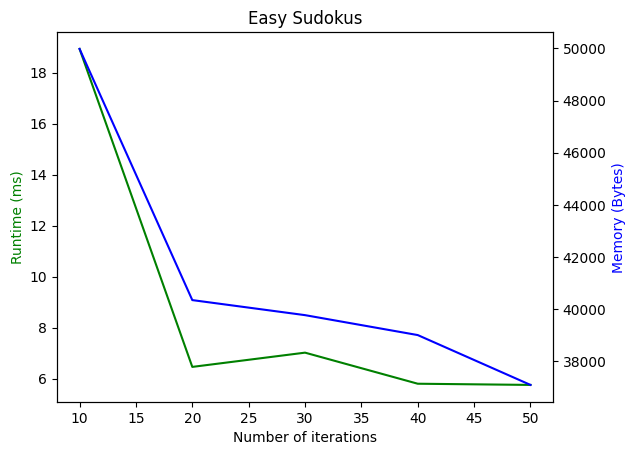

In [23]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
# Plotting Runtime on the left y-axis and Memory on the right y-axis for Easy
x = [10, 20, 30, 40, 50]
y_easy_runtime = [(np.mean(easy_times_10_run_1)+np.mean(easy_times_10_run_2)+np.mean(easy_times_10_run_3))/3, (np.mean(easy_times_20_run_1)+np.mean(easy_times_20_run_2)+np.mean(easy_times_20_run_3))/3, (np.mean(easy_times_30_run_1)+np.mean(easy_times_30_run_2)+np.mean(easy_times_30_run_3))/3, (np.mean(easy_times_40_run_1)+np.mean(easy_times_40_run_2)+np.mean(easy_times_40_run_3))/3, (np.mean(easy_times_50_run_1)+np.mean(easy_times_50_run_2)+np.mean(easy_times_50_run_3))/3]
y_easy_memory = [(np.mean(easy_memory_10_run_1)+np.mean(easy_memory_10_run_2)+np.mean(easy_memory_10_run_3))/3, (np.mean(easy_memory_20_run_1)+np.mean(easy_memory_20_run_2)+np.mean(easy_memory_20_run_3))/3, (np.mean(easy_memory_30_run_1)+np.mean(easy_memory_30_run_2)+np.mean(easy_memory_30_run_3))/3, (np.mean(easy_memory_40_run_1)+np.mean(easy_memory_40_run_2)+np.mean(easy_memory_40_run_3))/3, (np.mean(easy_memory_50_run_1)+np.mean(easy_memory_50_run_2)+np.mean(easy_memory_50_run_3))/3]
ax1.plot(x, y_easy_runtime, 'g-')
ax2.plot(x, y_easy_memory, 'b-')

ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Runtime (ms)', color='g')
ax2.set_ylabel('Memory (Bytes)', color='b')
plt.title("Easy Sudokus")
plt.show()


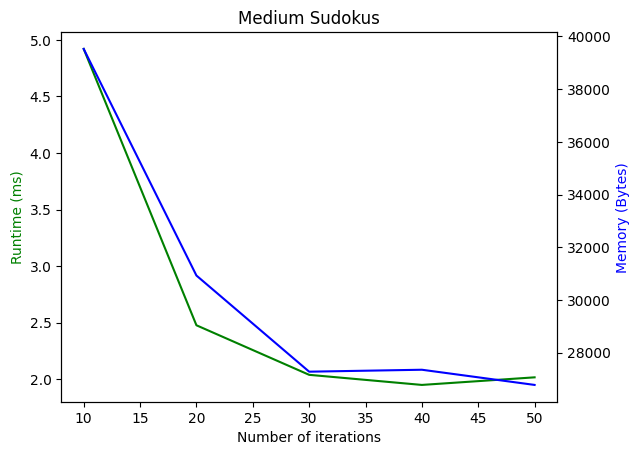

In [24]:
# For Medium Sudokus
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
x = [10, 20, 30, 40, 50]
y_medium_runtime = [(np.mean(medium_times_10_run_1)+np.mean(medium_times_10_run_2)+np.mean(medium_times_10_run_3))/3, (np.mean(medium_times_20_run_1)+np.mean(medium_times_20_run_2)+np.mean(medium_times_20_run_3))/3, (np.mean(medium_times_30_run_1)+np.mean(medium_times_30_run_2)+np.mean(medium_times_30_run_3))/3, (np.mean(medium_times_40_run_1)+np.mean(medium_times_40_run_2)+np.mean(medium_times_40_run_3))/3, (np.mean(medium_times_50_run_1)+np.mean(medium_times_50_run_2)+np.mean(medium_times_50_run_3))/3]
y_medium_memory = [(np.mean(medium_memory_10_run_1)+np.mean(medium_memory_10_run_2)+np.mean(medium_memory_10_run_3))/3, (np.mean(medium_memory_20_run_1)+np.mean(medium_memory_20_run_2)+np.mean(medium_memory_20_run_3))/3, (np.mean(medium_memory_30_run_1)+np.mean(medium_memory_30_run_2)+np.mean(medium_memory_30_run_3))/3, (np.mean(medium_memory_40_run_1)+np.mean(medium_memory_40_run_2)+np.mean(medium_memory_40_run_3))/3, (np.mean(medium_memory_50_run_1)+np.mean(medium_memory_50_run_2)+np.mean(medium_memory_50_run_3))/3]
ax1.plot(x, y_medium_runtime, 'g-')
ax2.plot(x, y_medium_memory, 'b-')

ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Runtime (ms)', color='g')
ax2.set_ylabel('Memory (Bytes)', color='b')
plt.title("Medium Sudokus")
plt.show()


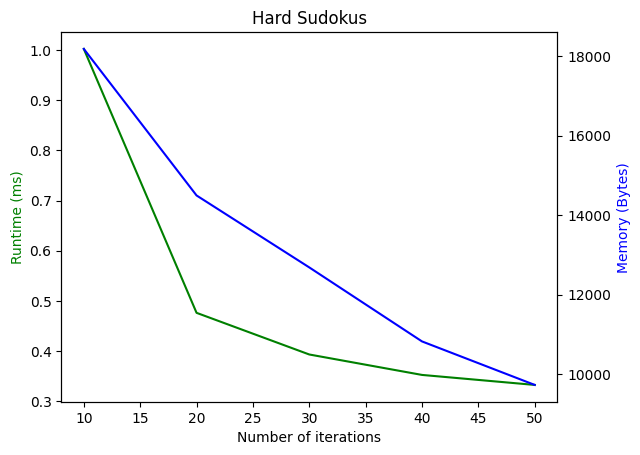

In [25]:
# For Hard Sudokus
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
x = [10, 20, 30, 40, 50]
y_hard_runtime = [(np.mean(hard_times_10_run_1)+np.mean(hard_times_10_run_2)+np.mean(hard_times_10_run_3))/3, (np.mean(hard_times_20_run_1)+np.mean(hard_times_20_run_2)+np.mean(hard_times_20_run_3))/3, (np.mean(hard_times_30_run_1)+np.mean(hard_times_30_run_2)+np.mean(hard_times_30_run_3))/3, (np.mean(hard_times_40_run_1)+np.mean(hard_times_40_run_2)+np.mean(hard_times_40_run_3))/3, (np.mean(hard_times_50_run_1)+np.mean(hard_times_50_run_2)+np.mean(hard_times_50_run_3))/3]
y_hard_memory = [(np.mean(hard_memory_10_run_1)+np.mean(hard_memory_10_run_2)+np.mean(hard_memory_10_run_3))/3, (np.mean(hard_memory_20_run_1)+np.mean(hard_memory_20_run_2)+np.mean(hard_memory_20_run_3))/3, (np.mean(hard_memory_30_run_1)+np.mean(hard_memory_30_run_2)+np.mean(hard_memory_30_run_3))/3, (np.mean(hard_memory_40_run_1)+np.mean(hard_memory_40_run_2)+np.mean(hard_memory_40_run_3))/3, (np.mean(hard_memory_50_run_1)+np.mean(hard_memory_50_run_2)+np.mean(hard_memory_50_run_3))/3]
ax1.plot(x, y_hard_runtime, 'g-')
ax2.plot(x, y_hard_memory, 'b-')

ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Runtime (ms)', color='g')
ax2.set_ylabel('Memory (Bytes)', color='b')
plt.title("Hard Sudokus")
plt.show()
